# 1. Wstęp do projektu. Import bibliotek oraz danych z dysku.

W poniższym projekcie badam dane statystyczne o państwach na świecie.  
Przyjrzymy się głównie PKB i towarzyszącym mu nierównościom, a także czynnikom które towarzyszą zróżnicowaniu.  
Zbadamy bliżej kilka zależności między PKB a innymi czynnikami.  

Na koniec spróbuję zaimplementować prosty algorytm do przewidywania PKB krajów.  
  

Link do zbioru danych użytych w projekcie:  
https://www.kaggle.com/datasets/fernandol/countries-of-the-world?resource=download


In [ ]:
# Importujemy biblioteki
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive

In [ ]:
drive.mount("/content/drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Sprawdzamy zawartość
!ls /content/drive/MyDrive/ColabNotebooks/

countries-of-the-world.csv  ProjektAiKraje.ipynb


In [ ]:
# Importujemy dane z dysku Google
kraje = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/countries-of-the-world.csv")

# Dane pobrane oryginalnie z Kaggle
# https://www.kaggle.com/datasets/fernandol/countries-of-the-world?resource=download

# 2. Eksplorujemy zaimportowane dane

In [ ]:
kraje.head(10)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,"9,7","0,13",0,"191,19",1900.0,"42,0","7,8","2,41","0,24","97,35",NaN,"45,11","24,2","0,096","0,658","0,246"
6,Anguilla,LATIN AMER. & CARIB,13477,102,"132,1","59,80","10,76","21,03",8600.0,"95,0","460,0",0,0,100,2,"14,17","5,34","0,04","0,18","0,78"
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,"156,0","34,54","-6,15","19,46",11000.0,"89,0","549,9","18,18","4,55","77,27",2,"16,93","5,37","0,038","0,22","0,743"
8,Argentina,LATIN AMER. & CARIB,39921833,2766890,"14,4","0,18","0,61","15,18",11200.0,"97,1","220,4","12,31","0,48","87,21",3,"16,73","7,55","0,095","0,358","0,547"
9,Armenia,C.W. OF IND. STATES,2976372,29800,"99,9","0,00","-6,47","23,28",3500.0,"98,6","195,7","17,55","2,3","80,15",4,"12,07","8,23","0,239","0,343","0,418"


In [ ]:
kraje.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

In [ ]:
len(kraje) # Ilość wierszy w tabeli

227

Widzimy, że dane mają 20 kolumn z różnymi danymi o krajach.
Krajów w tabeli mamy 20, ale niektóre kolumny mają wartości null. Sprawdzamy które.

In [ ]:
kraje.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

Dane są bardzo dobrej jakości, tylko jeden kraj nie ma podanego PKB, a jedynie kilkanaście krajów ma wartości null w innych kolumnach.  
Mamy natomiast inny problem - większość kolumn mimo iż zawiera dane liczbowe, to są one w formacie object, zatem aby móc traktować je jak liczby, musimy przekształcić je do formatu float lub int. Zajmiemy się tym za chwilę.

In [ ]:
# Sortujemy tabelę po PKB, od najwyższego malejąco i zapisujemy
krajeGdp = kraje.sort_values(by="GDP ($ per capita)", ascending=False)

In [ ]:
# Na potrzeby projektu pozbędziemy sie rzędów z null oraz uprościmy tabelę usuwając kilka kolumn.
krajeGdp = krajeGdp.dropna()

krajeGdp = krajeGdp.drop(['Arable (%)','Crops (%)', 'Other (%)', 'Climate'], axis=1)

In [ ]:
len(krajeGdp)

179

Po wyrzuceniu wierszy z null zostało nam 179 krajów do dalszej analizy.

In [ ]:
#sprawdzamy ostatnie 20 wierszy z tabeli, czyli kraje o najniższym PKB
krajeGdp.tail(20)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Birthrate,Deathrate,Agriculture,Industry,Service
107,Kenya,SUB-SAHARAN AFRICA,34707817,582650,"59,6","0,09","-0,1","61,47",1000.0,"85,1","8,1","39,72","14,02","0,163","0,188","0,651"
117,Liberia,SUB-SAHARAN AFRICA,3042004,111370,"27,3","0,52",0,"128,87",1000.0,"57,5","2,3","44,77","23,1","0,769","0,054","0,177"
199,Tajikistan,C.W. OF IND. STATES,7320815,143100,"51,2","0,00","-2,86","110,76",1000.0,"99,4","33,5","32,65","8,25","0,234","0,286","0,48"
128,Mali,SUB-SAHARAN AFRICA,11716829,1240000,"9,5","0,00","-0,33","116,79",900.0,"46,4","6,4","49,82","16,89","0,45","0,17","0,38"
152,Nigeria,SUB-SAHARAN AFRICA,131859731,923768,"142,7","0,09","0,26","98,8",900.0,"68,0","9,3","40,43","16,94","0,269","0,487","0,244"
124,Madagascar,SUB-SAHARAN AFRICA,18595469,587040,"31,7","0,82",0,"76,83",800.0,"68,9","3,6","41,41","11,11","0,276","0,165","0,559"
151,Niger,SUB-SAHARAN AFRICA,12525094,1267000,"9,9","0,00","-0,67","121,69",800.0,"17,6","1,9","50,73","20,91","0,39","0,17","0,44"
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,"15,3","0,00",0,"88,29",800.0,"80,6","8,2",41,"19,93","0,22","0,29","0,489"
224,Yemen,NEAR EAST,21456188,527970,"40,6","0,36",0,"61,5",800.0,"50,2","37,2","42,89","8,3","0,135","0,472","0,393"
87,Guinea-Bissau,SUB-SAHARAN AFRICA,1442029,36120,"39,9","0,97","-1,57","107,17",800.0,"42,4","7,4","37,22","16,53","0,62","0,12","0,26"


In [ ]:
# Sprawdzamy nazwy kolumn
kraje.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

In [ ]:
# Przekształcamy typ objektów w kolumnach, które będą nam później potrzebne.
# Zamieniamy "," na "." oraz object na float

krajeGdp['Phones (per 1000)'] = krajeGdp['Phones (per 1000)'].str.replace(',', '.').astype(float)
krajeGdp['Literacy (%)'] = krajeGdp['Literacy (%)'].str.replace(',', '.').astype(float)
krajeGdp['Pop. Density (per sq. mi.)'] = krajeGdp['Pop. Density (per sq. mi.)'].str.replace(',', '.').astype(float)

krajeGdp['Coastline (coast/area ratio)'] = krajeGdp['Coastline (coast/area ratio)'].str.replace(',', '.').astype(float)
krajeGdp['Net migration'] = krajeGdp['Net migration'].str.replace(',', '.').astype(float)
krajeGdp['Infant mortality (per 1000 births)'] = krajeGdp['Infant mortality (per 1000 births)'].str.replace(',', '.').astype(float)

krajeGdp['Birthrate'] = krajeGdp['Birthrate'].str.replace(',', '.').astype(float)
krajeGdp['Deathrate'] = krajeGdp['Deathrate'].str.replace(',', '.').astype(float)

krajeGdp['Agriculture'] = krajeGdp['Agriculture'].str.replace(',', '.').astype(float)
krajeGdp['Industry'] = krajeGdp['Industry'].str.replace(',', '.').astype(float)
krajeGdp['Service'] = krajeGdp['Service'].str.replace(',', '.').astype(float)


In [ ]:
# Sprawdzamy jak wyglądają przykładowe dane po przekształceniu
krajeGdp['Literacy (%)']

154    100.0
214     97.0
22      98.0
38      98.0
196     99.0
       ...  
0       36.0
33      51.6
125     62.7
183     31.4
188     37.8
Name: Literacy (%), Length: 179, dtype: float64

In [ ]:
krajeGdp.dtypes

Country                                object
Region                                 object
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)            float64
Coastline (coast/area ratio)          float64
Net migration                         float64
Infant mortality (per 1000 births)    float64
GDP ($ per capita)                    float64
Literacy (%)                          float64
Phones (per 1000)                     float64
Birthrate                             float64
Deathrate                             float64
Agriculture                           float64
Industry                              float64
Service                               float64
dtype: object

Uzyskaliśmy dane na których możemy już pracować, gdzie wszystkie inetersujce nas kolumny są w formacie liczbowym.

# 3. Wykresy i analiza statystyczna

[Text(0, 0.5, 'Ilość państw'),
 Text(0.5, 0, 'Wysokość PKB'),
 Text(0.5, 1.0, 'Ilość państw o danym PKB')]

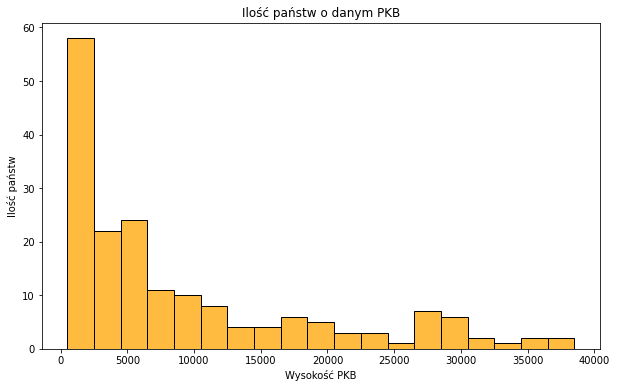

In [ ]:
# Sprawdzamy dystrybucję PKB na tle wszystkich wyników, grupujemy po 2000$.
plt.figure(figsize=(10,6))

dystrybucja = sns.histplot(krajeGdp['GDP ($ per capita)'], binwidth=2000, color='orange')
dystrybucja.set(xlabel='Wysokość PKB', ylabel='Ilość państw', title="Ilość państw o danym PKB")


Wykres pokazuje, że kraje o niskim PKB stanowią zdecydowaną większość. Dlatego w dalszej części podzielimy kraje na dwie grupy aby lepiej pokazać różnice w warościach porównywanych pól.

### Macierz korelacji między kolumnami

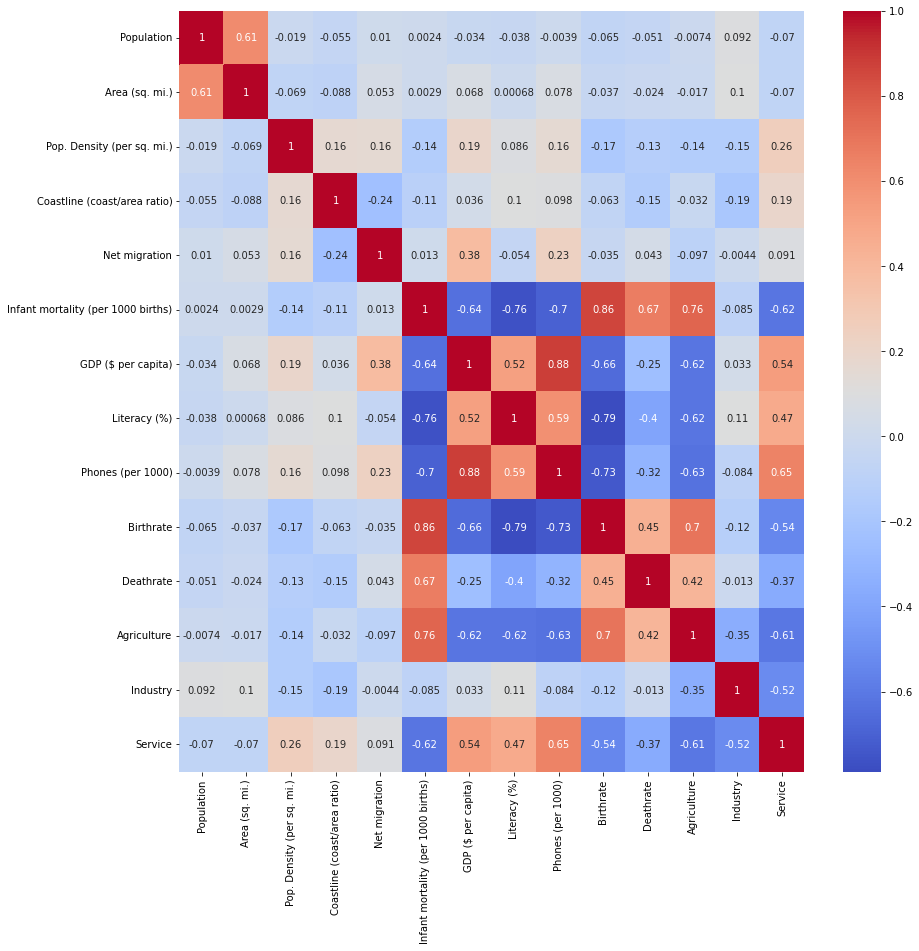

In [ ]:
# Sprawdzamy zależności między kolumnami
korelacje = krajeGdp.corr()

plt.figure(figsize=(14,14))
sns.heatmap(korelacje, annot=True, cmap="coolwarm")

Interesuje nas to jakie kolumny wpływają na wartość PKB (GDP per capita).  
Najsilniejsze korelacje występują między PKB a:  
- Migracją ludności  
- Umiejętnością czytania i pisania  
- Ilością telefonów na 1000 mieszkańców  
- Stopą urodzeń oraz śmiertelnością noworodków  
- Rolnictwem   
- Sektorem usług

Wykorzystamy te właśnie kolumny do stworzenia modelu uczenia maszynowego.
Przyjrzymy się też bliżej niektórym wartościom i zależnośćiom.

### Umiejętność czytania i pisania a PKB

Text(0, 0.5, 'Ilość państw')

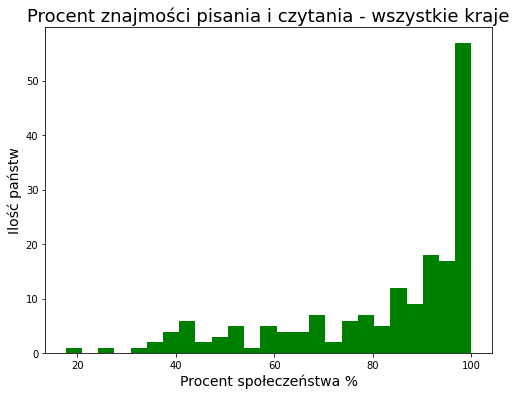

In [ ]:
x = krajeGdp["GDP ($ per capita)"]
y = krajeGdp["Literacy (%)"]

plt.figure(figsize=(8,6))

plt.hist(y, bins=25, color="green")
plt.title("Procent znajmości pisania i czytania - wszystkie kraje", fontsize=18)
plt.xlabel("Procent społeczeństwa %", fontsize=14)
plt.ylabel("Ilość państw", fontsize=14)

W zdecydowanej większości państw procent piśmiennictwa wynosi 80% lub więcej.  
Sprawdźmy jeszcze jak ma się to do PKB.

Text(0, 0.5, 'Procent znajomości czytania i pisania')

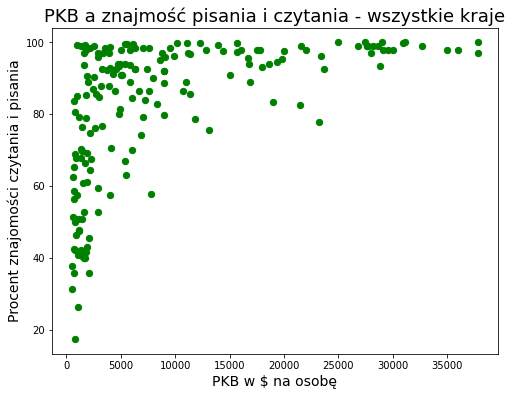

In [ ]:
# Sprawdzamy jak rozkłada się procent umiejętności czytania i pisania wedle PKB
plt.figure(figsize=(8,6))
plt.scatter(x, y, c="green", s=40)
plt.title("PKB a znajmość pisania i czytania - wszystkie kraje", fontsize=18)
plt.xlabel("PKB w $ na osobę", fontsize=14)
plt.ylabel("Procent znajomości czytania i pisania", fontsize=14)

Widzimy wyraźnie, że największy analfabetyzm panuje w najuboższych krajach.  
Wraz ze wzrostem PKB kraju rośnie również znajomość piśmiennictwa.

### Ilość telefonów na 1000 os.



**Dzielimy kraje na dwie grupy, aby lepiej pokazać różnice:**  
**PKB do 6000\$ oraz powyżej 6000\$**

In [ ]:
# Przyjmujemy 6000$ jako wartość graniczną dwóch grup
granica = 6000 
krajeLow = krajeGdp[krajeGdp['GDP ($ per capita)'] <= granica]
krajeHigh = krajeGdp[krajeGdp['GDP ($ per capita)'] > granica]

Text(0, 0.5, 'Ilość telefonów na 1000 os.')

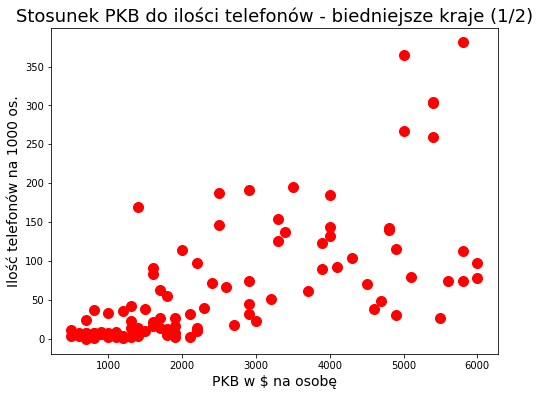

In [ ]:
# Sprawdzamy jak wygląda ilość telefonów komórkowych w stosunku do PKB
# Najpierw sprawdzamy kraje o PKB wyższym niż 6000$

x = krajeLow["GDP ($ per capita)"]
y = krajeLow["Phones (per 1000)"]

plt.figure(figsize=(8,6))

plt.scatter(x, y, s=100, c="red")
plt.title("Stosunek PKB do ilości telefonów - biedniejsze kraje (1/2)", fontsize=18)
plt.xlabel("PKB w $ na osobę", fontsize=14)
plt.ylabel("Ilość telefonów na 1000 os.", fontsize=14)


Text(0, 0.5, 'Ilość telefonów na 1000 os.')

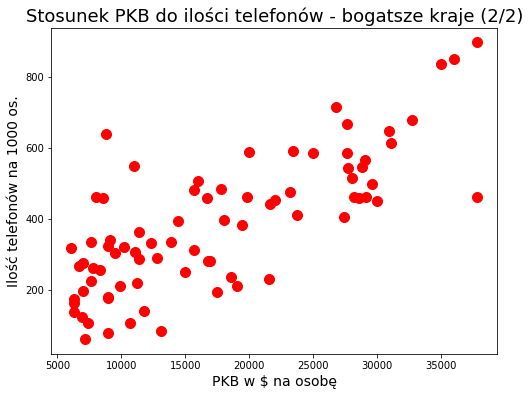

In [ ]:
# Teraz sprawdzamy bogatsze kraje o PKB powyżej niż 6000$

x = krajeHigh["GDP ($ per capita)"]
y = krajeHigh["Phones (per 1000)"]

plt.figure(figsize=(8,6))

plt.scatter(x, y, s=100, c="red")
plt.title("Stosunek PKB do ilości telefonów - bogatsze kraje (2/2)", fontsize=18)
plt.xlabel("PKB w $ na osobę", fontsize=14)
plt.ylabel("Ilość telefonów na 1000 os.", fontsize=14)

Możemy zauważyć, że w najbiedniejszych krajach telefonów nie ma prawie wcale albo jest ich bardzo mało. W miarę wzrostu PKB, telefonów jest coraz więcej.


### Migracja ludności

Text(0.1, 0.5, 'Migracja ludności')

<Figure size 1440x576 with 0 Axes>

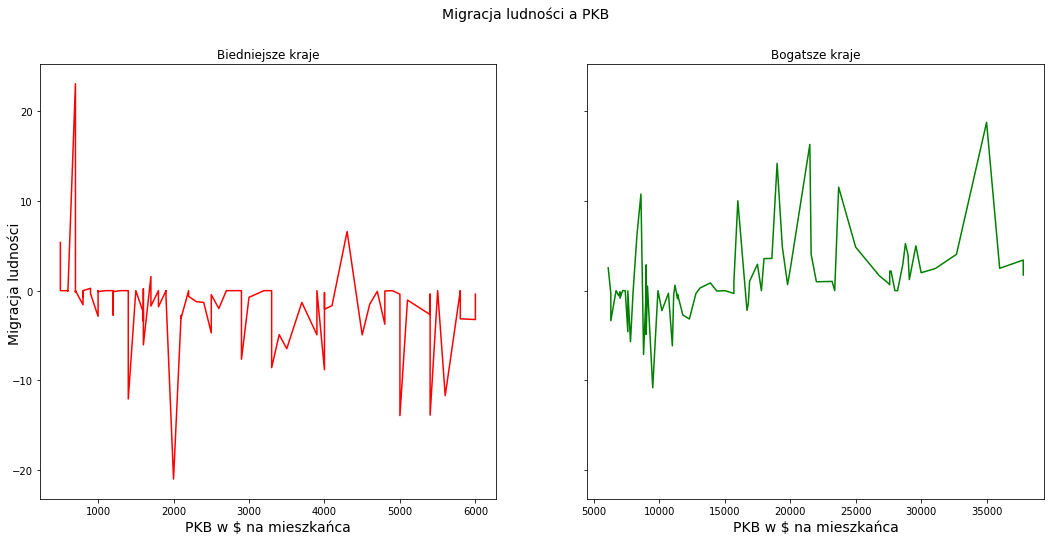

In [ ]:
migracjaLow = krajeLow["Net migration"]
gdpLow = krajeLow["GDP ($ per capita)"]
migracjaHigh = krajeHigh["Net migration"]
gdpHigh = krajeHigh["GDP ($ per capita)"]

plt.figure(figsize=(20,8))

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(18,8))
fig.suptitle("Migracja ludności a PKB", fontsize=14)
ax1.plot(gdpLow, migracjaLow, color="red")
ax1.set_title("Biedniejsze kraje")
ax1.set_xlabel("PKB w $ na mieszkańca", fontsize=14)

ax2.plot(gdpHigh, migracjaHigh, color="green")
ax2.set_title("Bogatsze kraje")
ax2.set_xlabel("PKB w $ na mieszkańca", fontsize=14)

fig.text(0.1, 0.5, 'Migracja ludności', fontsize=14, va='center', rotation='vertical')


Występuje wyraźna różnica między krajami o niskim i wysokim PKB.  
Z krajów biedniejszych więcej ludzi emigruje, natomiast do krajów bogatszych więcej ludności napływa. 

### Śmiertelność noworodków

Text(0, 0.5, 'Zgony na 1000 urodzeń')

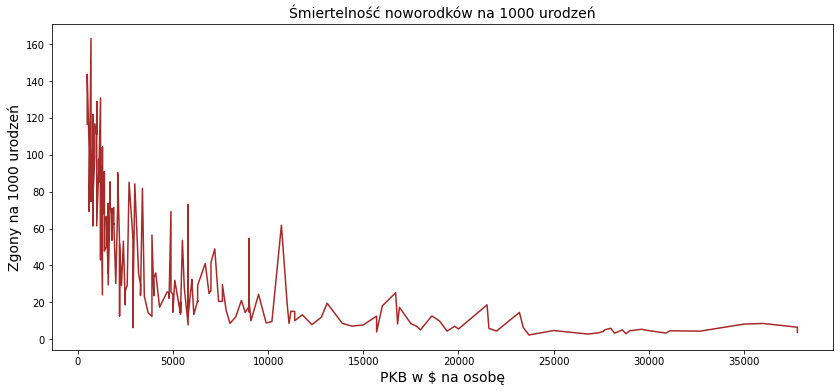

In [ ]:

x = krajeGdp["GDP ($ per capita)"]
y = krajeGdp["Infant mortality (per 1000 births)"]

plt.figure(figsize=(14,6))

plt.plot(x, y, c="brown")
plt.title("Śmiertelność noworodków na 1000 urodzeń", fontsize=14)
plt.xlabel("PKB w $ na osobę", fontsize=14)
plt.ylabel("Zgony na 1000 urodzeń", fontsize=14)

Wykres pokazuje, że w krajach o niskim PKB śmiertelność noworodków jest na bardzo wysokim poziomie i znacząco spada ze wzrostem PKB

# 4. Modelowanie i przewidywanie PKB

In [ ]:
krajeGdp

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Birthrate,Deathrate,Agriculture,Industry,Service
154,Norway,WESTERN EUROPE,4610820,323802,14.2,7.77,1.74,3.70,37800.0,100.0,461.7,11.46,9.40,0.021,0.415,0.564
214,United States,NORTHERN AMERICA,298444215,9631420,31.0,0.21,3.41,6.50,37800.0,97.0,898.0,14.14,8.26,0.010,0.204,0.787
22,Bermuda,NORTHERN AMERICA,65773,53,1241.0,194.34,2.49,8.53,36000.0,98.0,851.4,11.40,7.74,0.010,0.100,0.890
38,Cayman Islands,LATIN AMER. & CARIB,45436,262,173.4,61.07,18.75,8.19,35000.0,98.0,836.3,12.74,4.89,0.014,0.032,0.954
196,Switzerland,WESTERN EUROPE,7523934,41290,182.2,0.00,4.05,4.39,32700.0,99.0,680.9,9.71,8.49,0.015,0.340,0.645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,46.60,20.34,0.380,0.240,0.380
33,Burundi,SUB-SAHARAN AFRICA,8090068,27830,290.7,0.00,-0.06,69.29,600.0,51.6,3.4,42.22,13.46,0.463,0.203,0.334
125,Malawi,SUB-SAHARAN AFRICA,13013926,118480,109.8,0.00,0.00,103.32,600.0,62.7,7.9,43.13,19.33,0.342,0.158,0.499
183,Sierra Leone,SUB-SAHARAN AFRICA,6005250,71740,83.7,0.56,0.00,143.64,500.0,31.4,4.0,45.76,23.03,0.490,0.310,0.210


In [ ]:
# Uprościmy tabelę jeszcze bardziej zostawiając tylko kolumny z silnymi korelacjami z PKB
krajeML = krajeGdp.drop(['Region', 'Country', 'Population','Area (sq. mi.)', 'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)', 'Deathrate', 'Industry'], axis=1)

In [ ]:
krajeML

,Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Birthrate,Agriculture,Service
154,1.74,3.70,37800.0,100.0,461.7,11.46,0.021,0.564
214,3.41,6.50,37800.0,97.0,898.0,14.14,0.010,0.787
22,2.49,8.53,36000.0,98.0,851.4,11.40,0.010,0.890
38,18.75,8.19,35000.0,98.0,836.3,12.74,0.014,0.954
196,4.05,4.39,32700.0,99.0,680.9,9.71,0.015,0.645
...,...,...,...,...,...,...,...,...
0,23.06,163.07,700.0,36.0,3.2,46.60,0.380,0.380
33,-0.06,69.29,600.0,51.6,3.4,42.22,0.463,0.334
125,0.00,103.32,600.0,62.7,7.9,43.13,0.342,0.499
183,0.00,143.64,500.0,31.4,4.0,45.76,0.490,0.210


In [ ]:
# Dzielimy dane na zbiór trenujący(cechy) i kolumnę celu(PKB)
cechy = krajeML.drop(["GDP ($ per capita)"], axis=1)
cel = krajeML["GDP ($ per capita)"]


In [ ]:
# Dzielimy dane na zbiór treningowy i testowy

from sklearn.model_selection import train_test_split

cechyTrain, cechyTest, celTrain, celTest = train_test_split(cechy, cel)
print(f"Wielkość zbiorów treningowych: {len(cechyTrain)} i {len(celTrain)}, wielkość zbiorów testowych: {len(cechyTest)} i {len(celTest)}")

Wielkość zbiorów treningowych: 134 i 134, wielkość zbiorów testowych: 45 i 45


In [ ]:
# Budujemy model RandomForest

from sklearn.ensemble import RandomForestRegressor

rfModel = RandomForestRegressor()
rfModel.fit(cechyTrain, celTrain)

RandomForestRegressor()

In [ ]:
rfModel.score(cechyTest, celTest)

0.8382528729398104

Model sprawdza się całkiem nieźle - ma blisko 84% skutecznośći.  
Sprawdzimy jeszcze model na ręcznie wprowadzonych wartościach.  
Użyjemy do tego danych Szwajcarii oraz USA i zobaczymy co przewidzi model.

In [ ]:
krajeGdp.head(5)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Birthrate,Deathrate,Agriculture,Industry,Service
154,Norway,WESTERN EUROPE,4610820,323802,14.2,7.77,1.74,3.70,37800.0,100.0,461.7,11.46,9.40,0.021,0.415,0.564
214,United States,NORTHERN AMERICA,298444215,9631420,31.0,0.21,3.41,6.50,37800.0,97.0,898.0,14.14,8.26,0.010,0.204,0.787
22,Bermuda,NORTHERN AMERICA,65773,53,1241.0,194.34,2.49,8.53,36000.0,98.0,851.4,11.40,7.74,0.010,0.100,0.890
38,Cayman Islands,LATIN AMER. & CARIB,45436,262,173.4,61.07,18.75,8.19,35000.0,98.0,836.3,12.74,4.89,0.014,0.032,0.954
196,Switzerland,WESTERN EUROPE,7523934,41290,182.2,0.00,4.05,4.39,32700.0,99.0,680.9,9.71,8.49,0.015,0.340,0.645


In [ ]:
cechySzwajcaria = np.array([[4.05, 4.39, 99, 680.9, 9.71, 0.015, 0.645]])
daneSzwajcaria = pd.DataFrame(cechySzwajcaria, columns=cechyTrain.columns)

przewidywanieSz = rfModel.predict(daneSzwajcaria)

cechyUSA = np.array([[3.41, 6.5, 97, 898, 14.14, 0.01, 0.787]])
daneUSA = pd.DataFrame(cechyUSA, columns=cechyTrain.columns)

przewidywanieUSA = rfModel.predict(daneUSA)

print(f"Przewidywane PKB dla Szwajcarii to: {przewidywanieSz}")
print(f"Przewidywane PKB dla USA to: {przewidywanieUSA}")

Przewidywane PKB dla Szwajcarii to: [30578.]
Przewidywane PKB dla USA to: [34648.]


Model podał zaniżone wartości zarówno dla Szwajcarii oraz USA, jednak nie pomylił się dużo.  

Przewidywanie dla Szwajcarii to 30 578\$ podczas gdy prawdziwa wartośc to 32 700\$.  

Dla USA model podał 34 648\$, podczas gdy prawdziwa wartość to 37 800\$. 